In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

### Часть 1

Источник данных тут https://www.ssa.gov/oact/babynames/limits.html

План:
1. Скачать архив
2. Распаковать
3. Взять данные за 1880 год и присвоить имена колонкам: имя, пол, количество родившихся.
4. Найти сколько всего уникальных имен мальчиков и девочек.
5. Сколько всего родилось мальчиков и девочек.

In [2]:
# ответ 1.3, ваш код
path = 'names/yob1880.txt'
columns = ['name', 'sex', 'births']
df = pd.read_csv(path, names = columns)
df


,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [3]:
# ответ 1.4, ваш код
df.groupby("sex")["name"].nunique()

sex
F     942
M    1058
Name: name, dtype: int64

In [4]:
# ответ 1.5, ваш код
df.groupby("sex")["births"].sum()

sex
F     90994
M    110490
Name: births, dtype: int64

### Часть 2

План:
1. Собрать единую таблицу из разных файлов
2. Построить сводную таблицу по годам для количества рожденных мальчиков и девочек
3. Рисуем график рождаемости (2 графика matplotlib, seaborn)

In [5]:
# ответ 2.1, ваш код
years = range(1880, 2021, 1)
columns = ['name', 'sex', 'births']
df_list = []

for year in years:
    path = 'names/yob' + str(year) + '.txt'
    df = pd.read_csv(path, names = columns)
    df['years'] = year
    df_list.append(df)
    
names_pd = pd.concat(df_list, ignore_index = True) #присваеваем индекс только после присоединения
display(names_pd.head(2))
display(names_pd.tail(2))

,name,sex,births,years
0,Mary,F,7065,1880
1,Anna,F,2604,1880


,name,sex,births,years
2020861,Zyn,M,5,2020
2020862,Zyran,M,5,2020


In [6]:
# ответ 2.2, ваш код
total_births = names_pd.pivot_table(index = 'years', columns = 'sex', aggfunc = sum)
total_births

births         
sex          F        M
years                  
1880     90994   110490
1881     91953   100738
1882    107847   113686
1883    112319   104625
1884    129019   114442
...        ...      ...
2016   1768360  1893917
2017   1722140  1846154
2018   1695654  1810309
2019   1670419  1785527
2020   1598836  1706423

[141 rows x 2 columns]

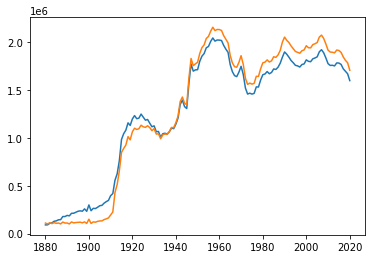

In [7]:
# ответ 2.3, ваш код
plt.plot(total_births)

In [10]:
#sns.lineplot(data = total_births, y = 'births')

### Часть 3.

План (пишем свои функции):
1. Найдем для каждого имени долю детей с данным именем относительно общего количества родившихся детей в году в зависимости от пола. Результат добавить отдельным столбцом в таблицу - процент.
2. Отберем 1000 имен самых популярных для каждого года в зависимости от пола. Результат сохранить в виде таблицы top_1000

In [31]:
# ответ 3.1, ваш код

def add_pct(df):
    df['pct'] = (df['births']/(df['births'].sum()))*100
    return df
    
names_pct = names_pd.groupby(['years', 'sex']).apply(add_pct)
names_pct
#names_pct.groupby(['years', 'sex'])['pct'].sum().unique()

,name,sex,births,years,pct
0,Mary,F,7065,1880,7.764248
1,Anna,F,2604,1880,2.861727
2,Emma,F,2003,1880,2.201244
3,Elizabeth,F,1939,1880,2.130910
4,Minnie,F,1746,1880,1.918808
...,...,...,...,...,...
2020858,Zykell,M,5,2020,0.000293
2020859,Zylus,M,5,2020,0.000293
2020860,Zymari,M,5,2020,0.000293
2020861,Zyn,M,5,2020,0.000293


In [41]:
# ответ 3.2, ваш код
def get_top_1000(df):
    return df.sort_values(by = 'births', ascending = False)[:1000]


top_1000 = names_pct.groupby(['years', 'sex']).apply(get_top_1000).reset_index(drop = True)
top_1000
#names_pct.groupby(['years', 'sex'])['name'].unique()

,name,sex,births,years,pct
0,Mary,F,7065,1880,7.764248
1,Anna,F,2604,1880,2.861727
2,Emma,F,2003,1880,2.201244
3,Elizabeth,F,1939,1880,2.130910
4,Minnie,F,1746,1880,1.918808
...,...,...,...,...,...
281871,Willie,M,211,2020,0.012365
281872,Kylian,M,211,2020,0.012365
281873,Turner,M,211,2020,0.012365
281874,Rogelio,M,210,2020,0.012306


### Часть 4.

План (построить график):

Найдем по два самых популярных в истории имени мальчиков и девочек и построим графики:
1.	В абсолютном значении - как менялось количество родившихся мальчиков с двумя самыми популярными именами в зависимости от года
2.	В относительном значении - как менялось количество родившихся девочек с двумя самыми популярными именами в зависимости от года
3. Построим в абсолютном значении график для всех четывех имен.


In [51]:
# ответ 4.1, ваш код
boys = top_1000[top_1000.sex == 'M']
girls = top_1000[top_1000.sex == 'F']

top_boys = boys.groupby(by = 'name').births.sum().nlargest(2).index
top_girls = girls.groupby(by = 'name').births.sum().nlargest(2).index
#top_1000.groupby(by = ['sex', 'name']).births.sum().groupby(level = 0, group_keys = False).nlargest(2)

In [64]:
boys_table = boys.pivot_table(index = 'years', columns = 'name', values = 'births', aggfunc = 'sum')[top_boys]
girls_table = girls.pivot_table(index = 'years', columns = 'name', values = 'births', aggfunc = 'sum')[top_girls]

<AxesSubplot:xlabel='years'>

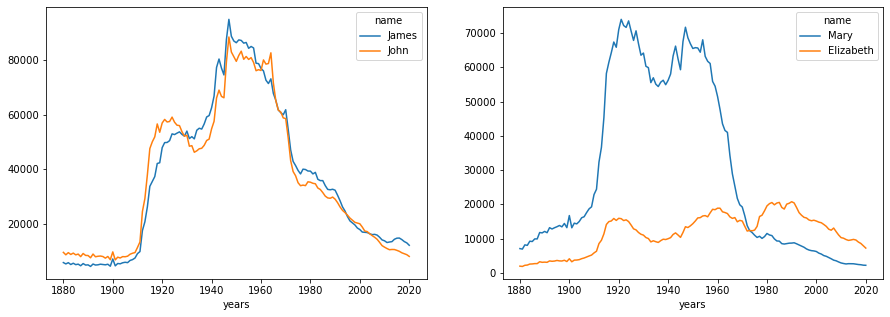

In [66]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
boys_table.plot(ax = ax[0])
girls_table.plot(ax = ax[1])

<AxesSubplot:xlabel='years'>

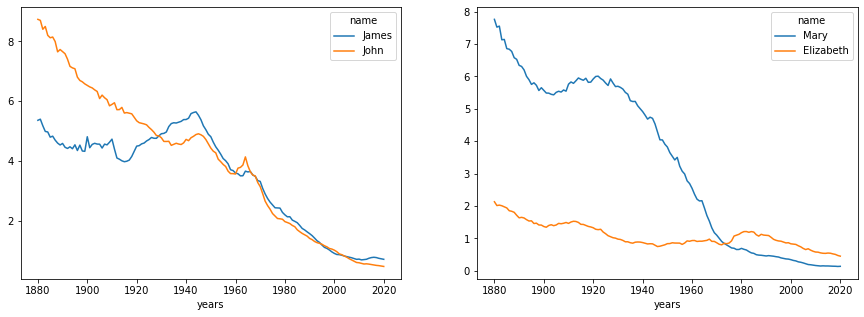

In [68]:
# ответ 4.2, ваш код
boys_table_pct = boys.pivot_table(index = 'years', columns = 'name', values = 'pct', aggfunc = 'sum')[top_boys]
girls_table_pct = girls.pivot_table(index = 'years', columns = 'name', values = 'pct', aggfunc = 'sum')[top_girls]

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
boys_table_pct.plot(ax = ax[0])
girls_table_pct.plot(ax = ax[1])

In [ ]:
# ответ 4.3, ваш код


### Часть 5.

Свободное задание: построить зависимость, отражающую растущее разнообразие имен в зависимости от года.

In [79]:
# ответ 5, ваш код
diversity = top_1000.pivot_table(index = 'years', columns = 'sex', values = 'pct', aggfunc = 'sum')
diversity

sex,F,M
years,,
1880,100.000000,99.737533
1881,100.000000,100.000000
1882,99.870186,99.564590
1883,99.759613,99.856631
1884,99.315605,99.453872
...,...,...
2016,74.202594,83.736193
2017,74.076149,83.361518
2018,74.150918,82.946116


<AxesSubplot:xlabel='years'>

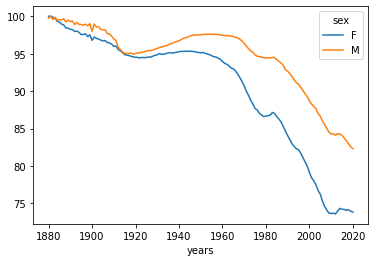

In [78]:
diversity.plot()

### Часть 6.

Свободное задание: построить тренд, отражающий количество самых популярных имен для 50% родившехся мальчиков и девочек 

<AxesSubplot:xlabel='years'>

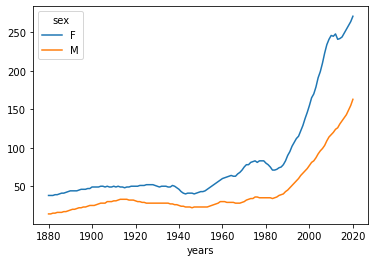

In [89]:
# ответ 6, ваш код
def get_count(df, q = .5):
    df_tmp = df.sort_values(by = 'pct', ascending = False).pct.cumsum()
    return df_tmp.values.searchsorted(q * 100) + 1


top_50 = top_1000.groupby(by = ['years', 'sex']).apply(get_count).unstack('sex')
top_50.plot()

### Часть 7.

В 2007 году исследователь детских имен Лора Ваттенберг указала на своем веб-сайте, 
что распределение имен мальчиков по последним буквам значительно изменилось за последние 100 лет.

Подтвердите или опровергните это утверждение (в сравнении 1910, 1940, 1970, 2020 года)

А что с девочками?


In [ ]:
# ответ 7, ваш код


### Часть 8.

Смена половой предпочтительности имени Leslie-Lesly (корень Lesl). Построить график. 

<AxesSubplot:xlabel='years'>

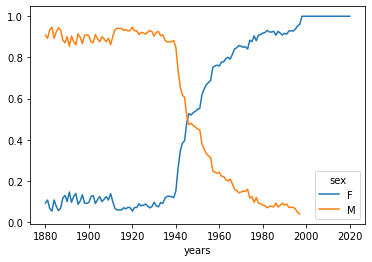

In [101]:
# ответ 7, ваш код
un_names = pd.Series(top_1000.name.unique())
les_names = un_names[un_names.str.lower().str.contains('lesl')]
temp = top_1000[top_1000.name.isin(les_names)]
temp1 = temp.pivot_table(values = 'births', index = 'years', columns = 'sex', aggfunc = 'sum')
table = temp1.div(temp1.sum(axis = 1), axis = 0)
table.plot()